In [114]:
# default_exp covid

In [115]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
#export
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import matplotlib.pyplot as pyplot
import numpy as np
import calendar
import seaborn as sns
from datetime import datetime, timedelta

In [117]:
monthLoc = mdates.MonthLocator()  # every month
month_fm = mdates.DateFormatter('%b')
figSize = (15,5)

## Data

In [118]:
#hide
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
s=requests.get(url).content
covid=pd.read_csv(io.StringIO(s.decode('utf-8')))

covid.to_csv("covid")
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0,0,0,0,0.0,0.0,...,2.5810000000000004,1.337,"1,803.987",nan,597.029,9.59,nan,nan,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0,0,0,0,0.0,0.0,...,2.5810000000000004,1.337,"1,803.987",nan,597.029,9.59,nan,nan,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0,0,0,0,0.0,0.0,...,2.5810000000000004,1.337,"1,803.987",nan,597.029,9.59,nan,nan,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0,0,0,0,0.0,0.0,...,2.5810000000000004,1.337,"1,803.987",nan,597.029,9.59,nan,nan,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0,0,0,0,0.0,0.0,...,2.5810000000000004,1.337,"1,803.987",nan,597.029,9.59,nan,nan,37.746,0.5


In [119]:
covid['date']= pd.to_datetime(covid['date']) 
covid.index = covid['date']
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23393 entries, 2019-12-31 to 2020-03-10
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         23329 non-null  object        
 1   continent                        23164 non-null  object        
 2   location                         23393 non-null  object        
 3   date                             23393 non-null  datetime64[ns]
 4   total_cases                      23393 non-null  int64         
 5   new_cases                        23393 non-null  int64         
 6   total_deaths                     23393 non-null  int64         
 7   new_deaths                       23393 non-null  int64         
 8   total_cases_per_million          23111 non-null  float64       
 9   new_cases_per_million            23111 non-null  float64       
 10  total_deaths_per_million         23111 no

In [120]:
usa = covid[covid["iso_code"] == "USA"]
usa.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
date,,,,,,,,,,,,,,,,,,,,,
2020-06-08,USA,North America,United States,2020-06-08,1942363,22302,110514,712,"5,868.119000000001",67.377,...,15.413,9.732000000000001,"54,225.445999999996",1.2,151.089,10.79,19.1,24.6,nan,2.77
2020-06-09,USA,North America,United States,2020-06-09,1961185,18822,111007,493,"5,924.983",56.864,...,15.413,9.732000000000001,"54,225.445999999996",1.2,151.089,10.79,19.1,24.6,nan,2.77
2020-06-10,USA,North America,United States,2020-06-10,1979850,18665,112006,999,"5,981.371999999999",56.388999999999996,...,15.413,9.732000000000001,"54,225.445999999996",1.2,151.089,10.79,19.1,24.6,nan,2.77
2020-06-11,USA,North America,United States,2020-06-11,2000464,20614,112924,918,"6,043.65",62.277,...,15.413,9.732000000000001,"54,225.445999999996",1.2,151.089,10.79,19.1,24.6,nan,2.77
2020-06-12,USA,North America,United States,2020-06-12,2023347,22883,113820,896,"6,112.781999999999",69.132,...,15.413,9.732000000000001,"54,225.445999999996",1.2,151.089,10.79,19.1,24.6,nan,2.77


In [121]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2019-12-31 to 2020-06-12
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         165 non-null    object        
 1   continent                        165 non-null    object        
 2   location                         165 non-null    object        
 3   date                             165 non-null    datetime64[ns]
 4   total_cases                      165 non-null    int64         
 5   new_cases                        165 non-null    int64         
 6   total_deaths                     165 non-null    int64         
 7   new_deaths                       165 non-null    int64         
 8   total_cases_per_million          165 non-null    float64       
 9   new_cases_per_million            165 non-null    float64       
 10  total_deaths_per_million         165 non-nu

### Counties

In [122]:
surl = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
s=requests.get(surl).content
counties=pd.read_csv(io.StringIO(s.decode('utf-8')))
counties.to_csv("counties.csv")
counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,"53,061.0",1,0
1,2020-01-22,Snohomish,Washington,"53,061.0",1,0
2,2020-01-23,Snohomish,Washington,"53,061.0",1,0
3,2020-01-24,Cook,Illinois,"17,031.0",1,0
4,2020-01-24,Snohomish,Washington,"53,061.0",1,0


In [123]:
counties.index = pd.to_datetime(counties['date'])
counties.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 227689 entries, 2020-01-21 to 2020-06-11
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    227689 non-null  object 
 1   county  227689 non-null  object 
 2   state   227689 non-null  object 
 3   fips    225273 non-null  float64
 4   cases   227689 non-null  int64  
 5   deaths  227689 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 12.2+ MB


### Mobility
https://www.apple.com/covid19/mobility

In [124]:
mobility=pd.read_csv("data/applemobilitytrends-2020-06-10.csv")
mobility.to_csv("mobility.csv")
mobility.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.3,101.43,97.2,...,90.62,88.33,89.97,84.3,93.46,102.16,111.59,93.78,95.51,92.69
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,84.18,93.86,87.72,94.75,83.24,81.96,87.25,87.38,90.83,91.09
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,39.64,41.88,43.77,45.84,52.26,47.48,27.32,44.06,47.0,48.1
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,29.5,31.25,30.65,31.93,37.34,33.53,19.6,34.36,35.81,36.25
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,80.87,84.72,88.62,100.24,104.34,83.85,85.16,86.92,88.07,90.36


### The Atlantic

In [125]:
surl = "https://covidtracking.com/api/v1/us/daily.csv"
s=requests.get(surl).content
theatlantic=pd.read_csv(io.StringIO(s.decode('utf-8')))
theatlantic.to_csv("theatlantic.csv")
theatlantic.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200611,56,2013778,"19,919,523.0","1,816.0","29,064.0","221,983.0","6,067.0","9,295.0","2,886.0",...,2020-06-11T00:00:00Z,21935117,21933301,21933301,936,1381,424514,22251,446765,22e0d9dd6b3d2cb6d2dc8988e6ed85c0a369e7a6
1,20200610,56,1991527,"19,495,009.0","1,737.0","30,203.0","220,602.0","6,242.0","9,225.0","3,020.0",...,2020-06-10T00:00:00Z,21488273,21486536,21486536,878,1513,398706,20762,419468,ee889a20c5fb39a6c863740f2e9baa4984f71546
2,20200609,56,1970765,"19,096,303.0","1,661.0","30,547.0","219,089.0","6,450.0","9,141.0","3,090.0",...,2020-06-09T00:00:00Z,21068729,21067068,21067068,902,1508,396731,17035,413766,c2868f3058c5715c78f1fdc25e9298dbe2baaf83
3,20200608,56,1953730,"18,699,572.0","1,606.0","29,969.0","217,581.0","6,394.0","9,013.0","3,240.0",...,2020-06-08T00:00:00Z,20654908,20653302,20653302,655,675,385104,17013,402117,f3edbbf1f9ad6e0d1b3f37ca1d46e17f8e3f6336
4,20200607,56,1936717,"18,314,468.0","1,733.0","30,299.0","216,906.0","6,493.0","8,957.0","3,298.0",...,2020-06-07T00:00:00Z,20252918,20251185,20251185,460,647,427094,19557,446651,4f33543a8fb09f7ba46a36626c43a345da01b26e


In [126]:
theatlantic['dated']= pd.to_datetime(theatlantic['date'],infer_datetime_format=True,format='%Y%m%d') 
theatlantic.index = theatlantic['dated']

## manipulation

In [127]:
startDate = datetime(year=2020,month=1,day=1)
endDate = datetime.today()

def keyFromDate(d):
    return str(d.year) + "-" + d.strftime('%m-%d')
    return str(d.year) + "-" + str( d.month) + "-" + str(d.day)

def processSample(x):
    arr = []
    currentDate = startDate
    delta = timedelta(days=1)
    while keyFromDate(currentDate) !=  keyFromDate(endDate):
        key =  keyFromDate(currentDate)
        #print(key)
        if  key in x:
            arr.append(x[key])
        else:
            arr.append(np.nan)
        currentDate += delta
    return arr #{x['transportation_type']:arr}

def processTable(y,keyName = 'transportation_type'):
    ret = {}
    dateRange = []
    dateKeys = []
    currentDate = startDate
    delta = timedelta(days=1)
    while keyFromDate(currentDate) !=  keyFromDate(endDate):
        key =  keyFromDate(currentDate)
        dateKeys.append(calendar.day_name[currentDate.weekday()])
        dateRange.append(pd.Timestamp(currentDate))
        currentDate += delta
    ret = {"keys": dateKeys,"date":dateRange}
    for x in y:
        ret[x[keyName]] = processSample(x)
    return pd.DataFrame.from_dict(ret)

In [128]:
SanFranMob = processTable(mobility[mobility["region"] == "San Francisco - Bay Area"].to_dict('records'))
SanFranMob.to_csv("SanFranMob.csv")
SanFranMob.index = SanFranMob["date"]
SanFranMob.tail(5)

,keys,date,driving,transit,walking
date,,,,,
2020-06-07,Sunday,2020-06-07,65.75,25.2,46.93
2020-06-08,Monday,2020-06-08,75.13,30.06,49.19
2020-06-09,Tuesday,2020-06-09,78.4,30.61,52.13
2020-06-10,Wednesday,2020-06-10,80.09,30.82,52.37
2020-06-11,Thursday,2020-06-11,nan,nan,nan


In [129]:
yesterday = (datetime.now() - timedelta(days=1)).strftime("%A")
yesterday

'Thursday'

In [130]:
counties.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 227689 entries, 2020-01-21 to 2020-06-11
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    227689 non-null  object 
 1   county  227689 non-null  object 
 2   state   227689 non-null  object 
 3   fips    225273 non-null  float64
 4   cases   227689 non-null  int64  
 5   deaths  227689 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 12.2+ MB


In [131]:
worst = counties[counties.index.strftime("%A") == yesterday]
worst = worst[["state","county","cases"]]
worst = worst.sort_values(["state","county"])
worst["diff"] = worst.cases.diff()
worst = worst[worst.index >= (datetime.now() - timedelta(days=2)) ]
worst.sort_values("diff",ascending=False).head(20)


,state,county,cases,diff
date,,,,
2020-06-11,California,Los Angeles,68875,"9,225.0"
2020-06-11,Arizona,Maricopa,16148,"4,919.0"
2020-06-11,Illinois,Cook,83978,"3,265.0"
2020-06-11,New York,New York City,213271,"3,044.0"
2020-06-11,Michigan,Oakland,11283,"2,845.0"
2020-06-11,Texas,Harris,15864,"2,261.0"
2020-06-11,Texas,Dallas,13257,"2,014.0"
2020-06-11,California,Riverside,10240,"1,937.0"
2020-06-11,Florida,Miami-Dade,20547,"1,769.0"


In [132]:
worst = counties[counties.index.strftime("%A") == yesterday]
worst = worst[["state","county","deaths"]]
worst = worst.sort_values(["state","county"])
worst["diff"] = worst.deaths.diff()
worst = worst[worst.index >= (datetime.now() - timedelta(days=2)) ]
#pd.apply('{:,}'.format)
#pd.options.display.float_format = '{:,}'.format
#?pd.options.display # = '{:,}'.format
#worst.style.format("{:.2%}")
worst.sort_values("diff",ascending=False).head(20)



,state,county,deaths,diff
date,,,,
2020-06-11,California,Los Angeles,2813,282.0
2020-06-11,Illinois,Cook,4111,265.0
2020-06-11,New York,New York City,21468,234.0
2020-06-11,Illinois,Unknown,178,178.0
2020-06-11,Michigan,Wayne,2664,172.0
2020-06-11,Rhode Island,Providence,637,119.0
2020-06-11,Pennsylvania,Philadelphia,1471,77.0
2020-06-11,Arizona,Maricopa,532,61.0
2020-06-11,Minnesota,Hennepin,700,59.0


## plotting

In [133]:
def myplot(data,ax=None):
    monthLoc = mdates.MonthLocator()  # every month
    month_fm = mdates.DateFormatter('%b')
    plt.figure(figsize=(15,5))
    if ax == None:
        ax = sns.lineplot(data=data, palette="tab10", markers=True, linewidth = 0.5) #, linewidth=2.5)  
    else:
        ax = sns.lineplot(data=data, markers=True, color="g", ax=ax)
    ax.xaxis.set_major_locator(monthLoc)
    ax.xaxis.set_major_formatter(month_fm)
    ax.xaxis.set_minor_locator(monthLoc)
    ax.set_xlabel("Date")
    return ax


def myscatter(data,ax=None):
    monthLoc = mdates.MonthLocator()  # every month
    month_fm = mdates.DateFormatter('%b')
    plt.figure(figsize=(15,5))
    if ax == None:
        data.dropna()
        ax = sns.scatterplot(data=data, palette="tab10") #, linewidth=2.5)  
    else:
        ax = sns.lineplot(data=data, color="g", ax=ax)
    #ax.xaxis.set_major_locator(monthLoc)
    #ax.xaxis.set_major_formatter(month_fm)
    #ax.xaxis.set_minor_locator(monthLoc)
    #ax.set_xlabel("Date")
    return ax

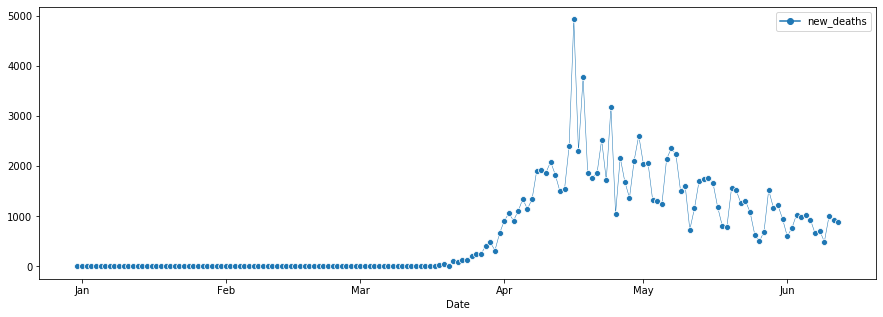

In [134]:
temp = myplot(usa[["new_deaths"]])

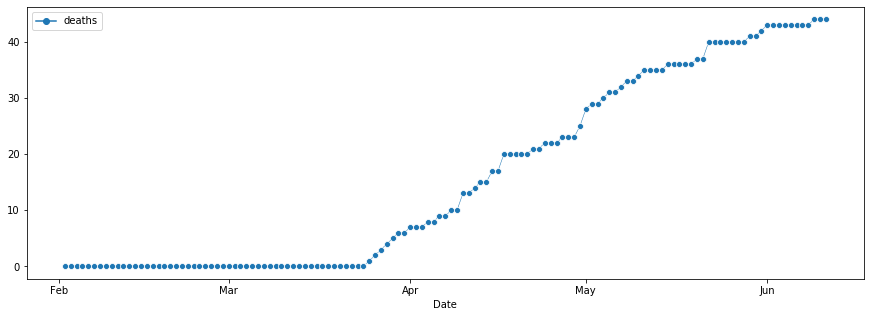

In [135]:
sanfran = counties[counties["county"] == "San Francisco"]
temp = myplot(sanfran[["deaths"]])

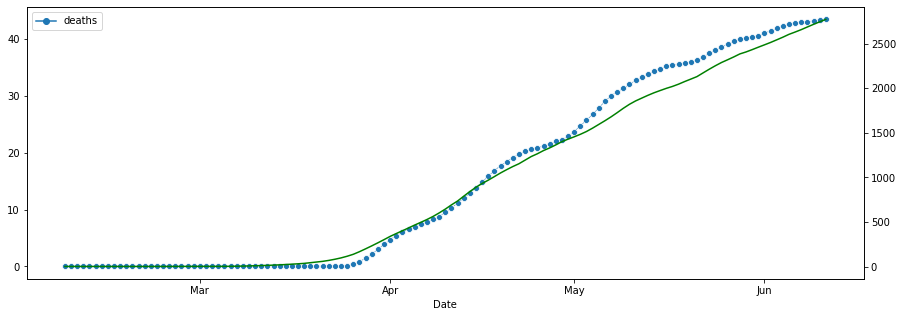

<Figure size 1080x360 with 0 Axes>

In [136]:
sfrolling = sanfran[["deaths","cases"]].rolling(7).mean()
temp = myplot(sfrolling[["deaths"]])
ax2 = plt.twinx()
temp = myplot(sfrolling.cases, ax=ax2)

In [137]:
sanfran.tail(15)

,date,county,state,fips,cases,deaths
date,,,,,,
2020-05-28,2020-05-28,San Francisco,California,"6,075.0",2440,40
2020-05-29,2020-05-29,San Francisco,California,"6,075.0",2476,41
2020-05-30,2020-05-30,San Francisco,California,"6,075.0",2535,41
2020-05-31,2020-05-31,San Francisco,California,"6,075.0",2561,42
2020-06-01,2020-06-01,San Francisco,California,"6,075.0",2573,43
2020-06-02,2020-06-02,San Francisco,California,"6,075.0",2590,43
2020-06-03,2020-06-03,San Francisco,California,"6,075.0",2616,43
2020-06-04,2020-06-04,San Francisco,California,"6,075.0",2647,43
2020-06-05,2020-06-05,San Francisco,California,"6,075.0",2701,43


In [138]:
sanfran.to_csv("SanFran.csv")

In [139]:
def isCounty(x):
    return x.country == "United States" and x.geo_type == 'county' # and x.transportation_type =='driving'

def countyMobile(x, state = "California"): 
    myreg = [y + " County" for y in x]
    mobility["use"] =  mobility.apply(lambda row: isCounty(row) and row["sub-region"] == state and row.region in myreg  , axis = 1) 
    good = mobility[mobility.use]
    records = good.to_dict('records')
    if len(records) < 1 :
        return  plt.plot()
    mob =  processTable(records,keyName="region")
    mob.index = mob["date"]
    ax = myplot(mob[myreg].rolling(7).mean())
    ax.set_title('Driving')
    return ax

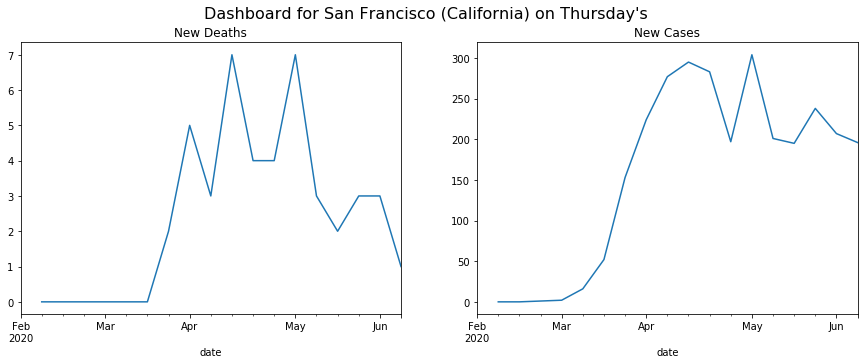

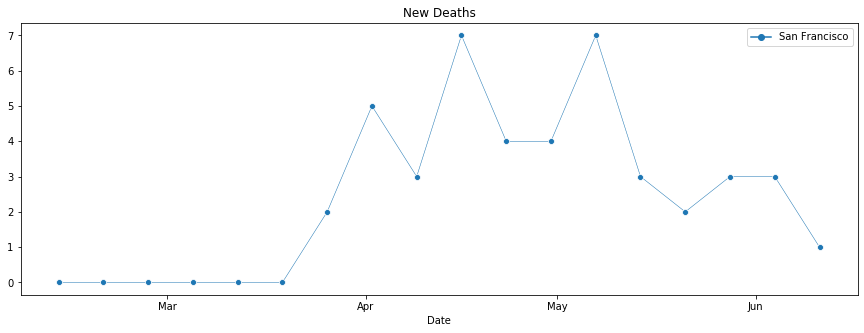

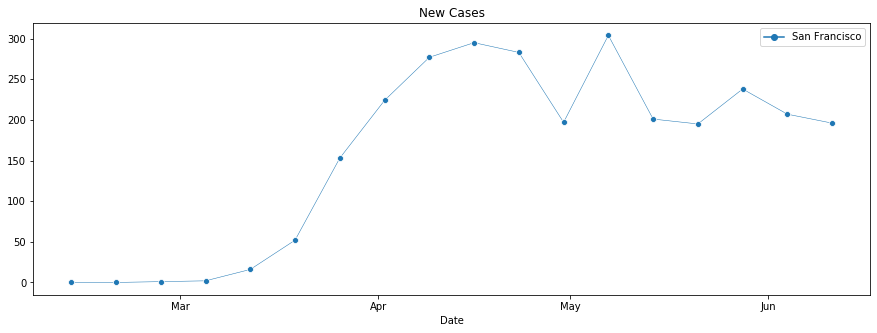

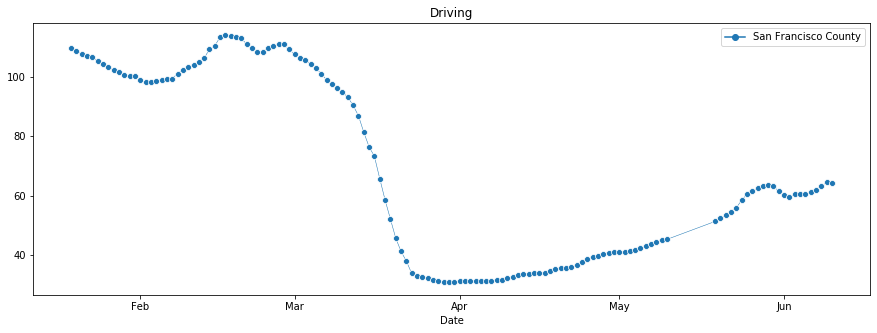

In [140]:
def countyDashBoard(myreg, state = "California"):
    myreg.sort()
    yesterday = (datetime.now() - timedelta(days=1)).strftime("%A")
    counties["use"] =  counties.apply(lambda row: row.county in myreg and row.state == state , axis = 1) 
    good = counties[counties.use]
    good = good[good.index.strftime("%A") == yesterday  ]
    combine = good.groupby([good.index]).sum()
    #plt.title('A sine wave with a gap of NaNs between 0.4 and 0.6')
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
    ax = combine.deaths.diff().plot(ax=ax1 )
    fig.suptitle("Dashboard for " + ", ".join(myreg) + " (" + state + ") on " + yesterday +"'s", fontsize=16)
    ax1.set_title('New Deaths')
    ax = combine.cases.diff().plot(ax=ax2 )
    ax2.set_title('New Cases')
    ax= myplot(good.pivot( columns='county', values='deaths').diff())
    ax.set_title('New Deaths')
    ax= myplot(good.pivot( columns='county', values='cases').diff())
    ax.set_title('New Cases')
    ax = countyMobile(myreg,state=state)
    

countyDashBoard(["San Francisco"])

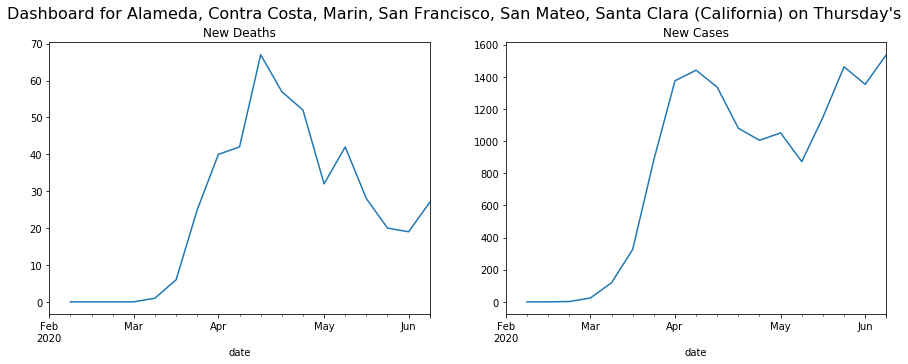

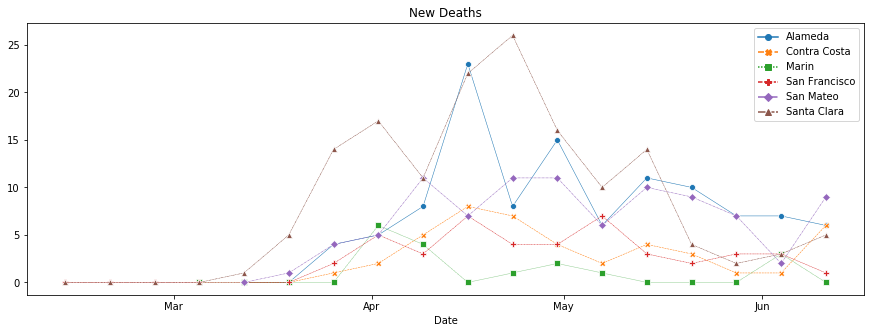

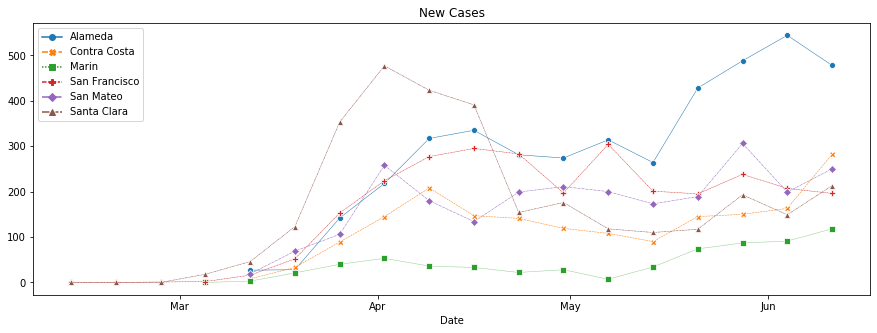

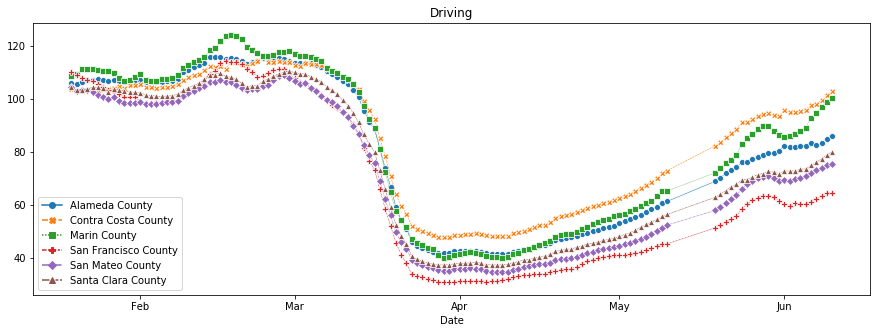

In [141]:
countyDashBoard(["San Francisco","Marin","San Mateo","Alameda","Contra Costa","Santa Clara"])

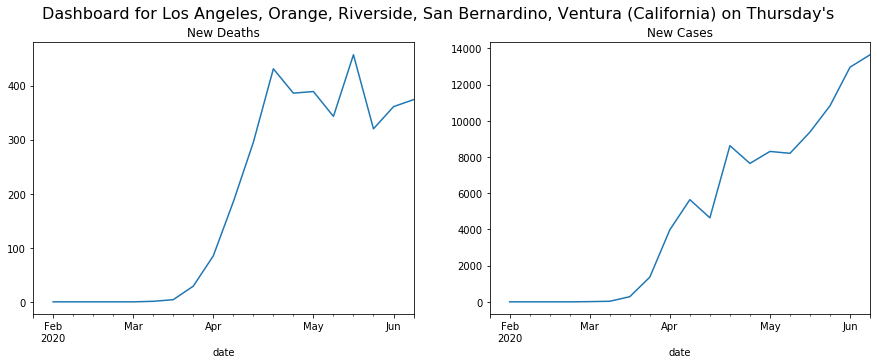

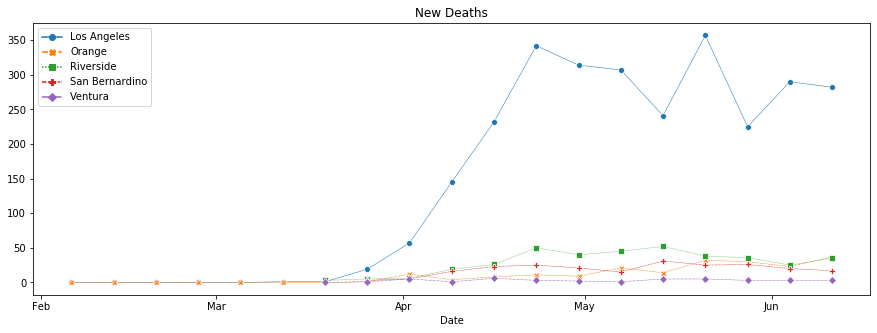

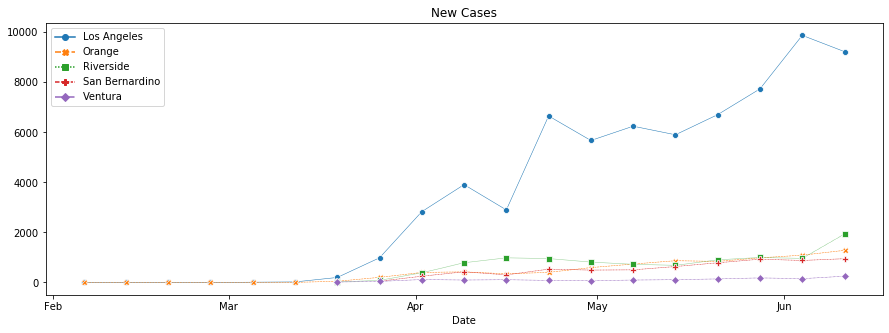

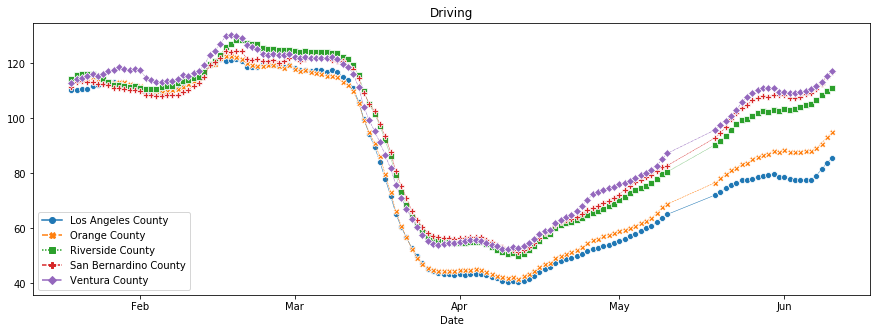

In [142]:
countyDashBoard(["Orange","Ventura","San Bernardino","Los Angeles","Riverside"])

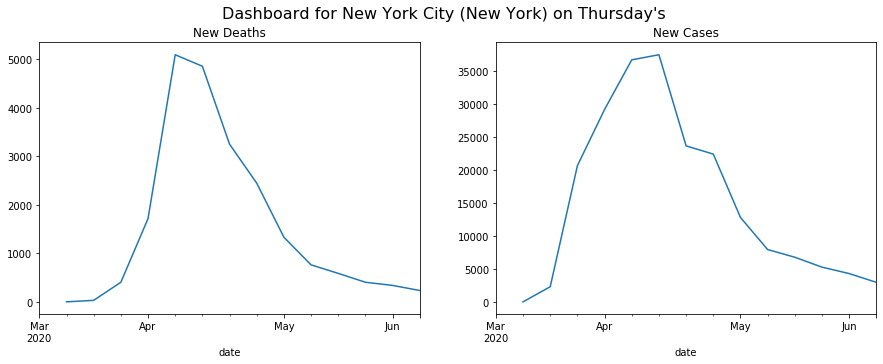

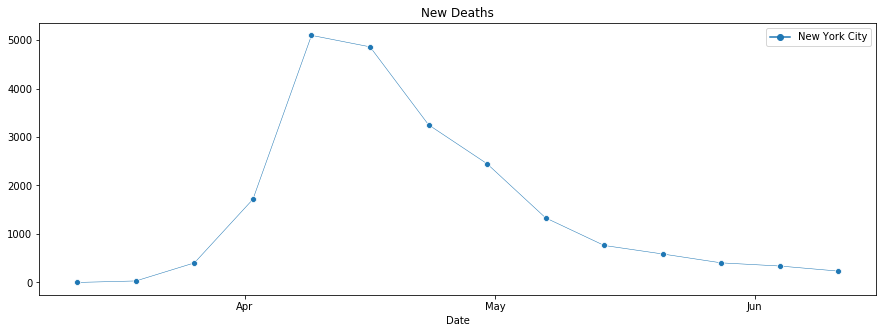

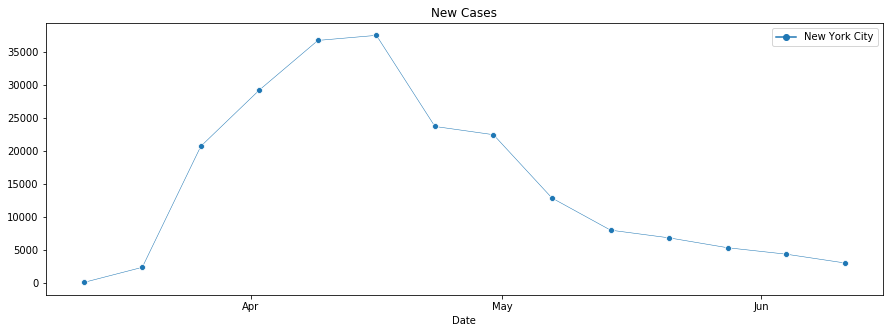

In [143]:
countyDashBoard(["New York City"],state="New York")
#counties[counties.state == "New York"]

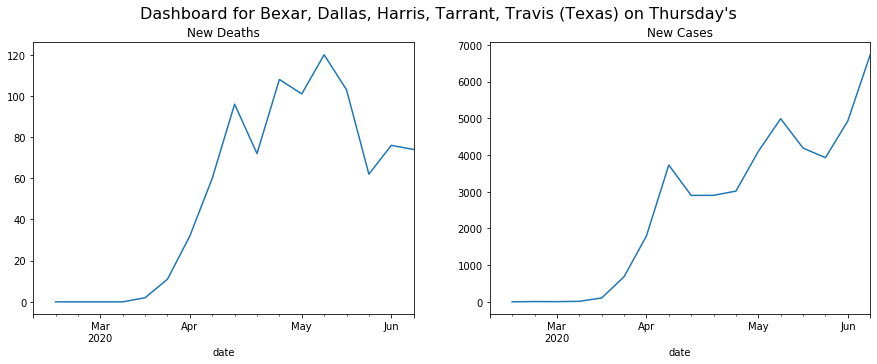

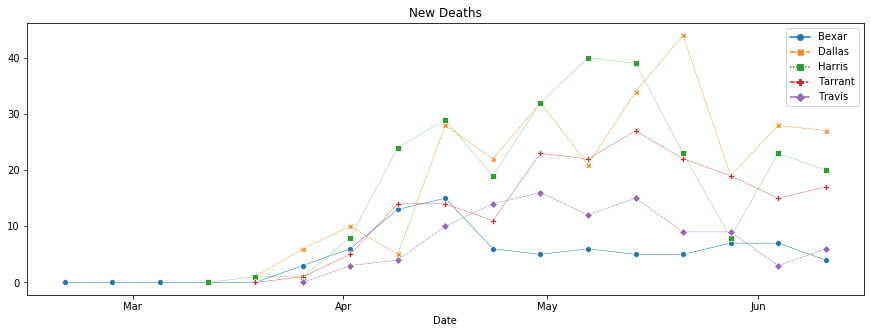

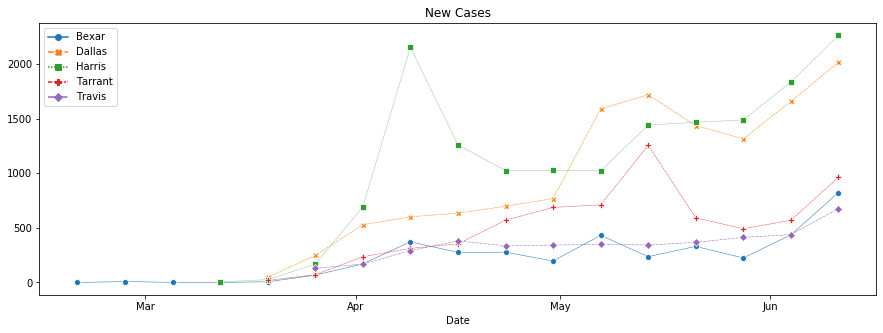

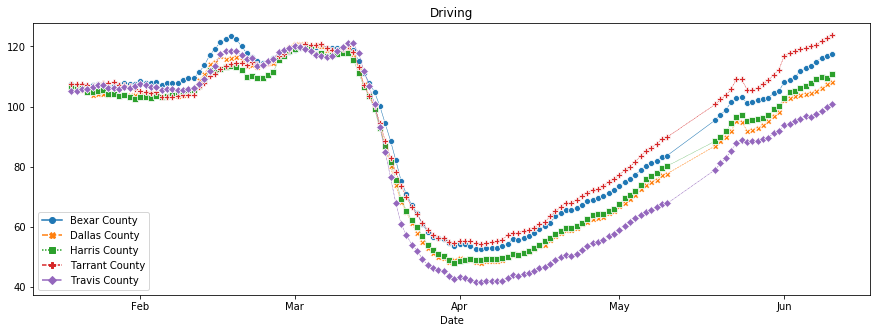

In [144]:
countyDashBoard(["Harris","Dallas","Tarrant","Bexar","Travis"],state="Texas")

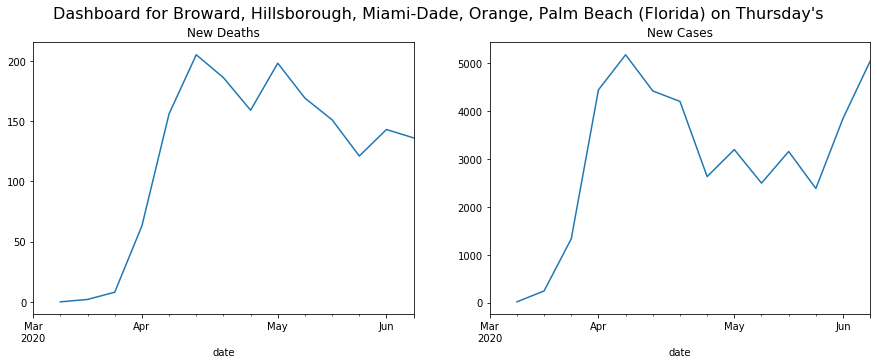

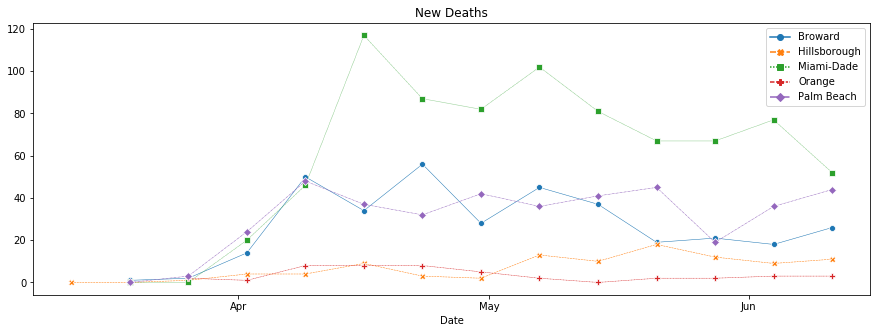

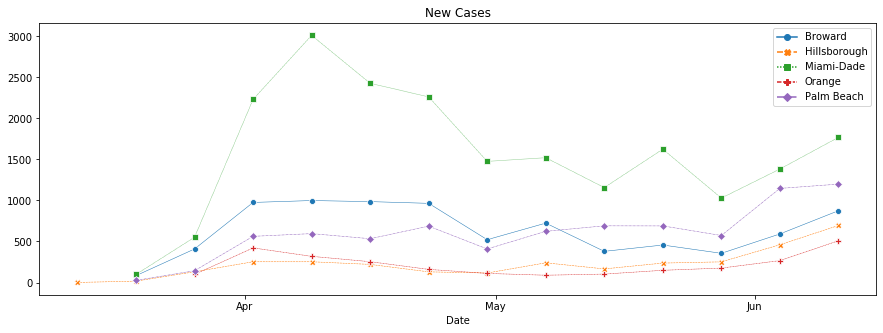

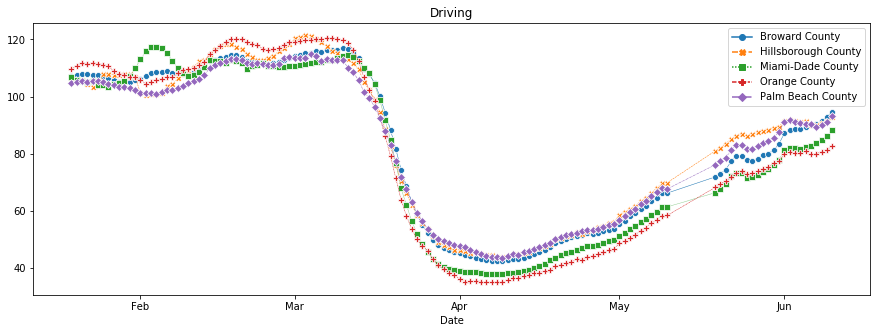

In [145]:
countyDashBoard(["Miami-Dade","Broward","Palm Beach","Hillsborough","Orange"],state="Florida")

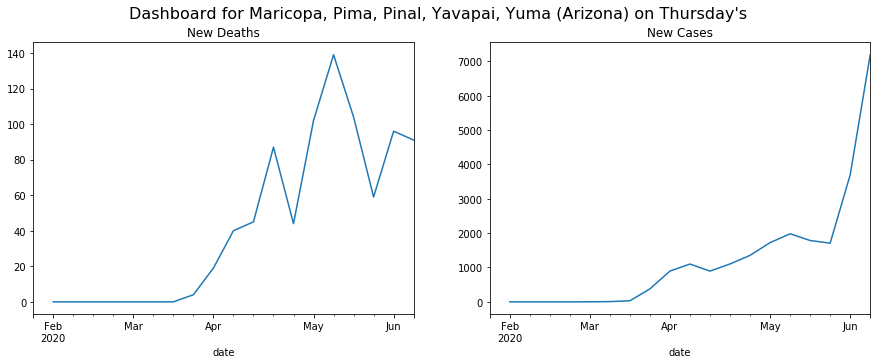

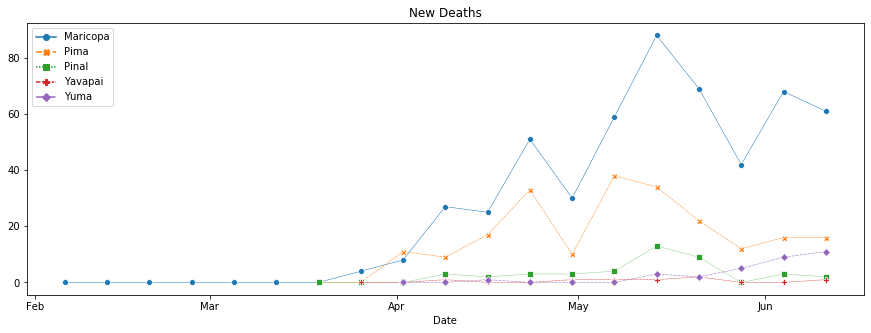

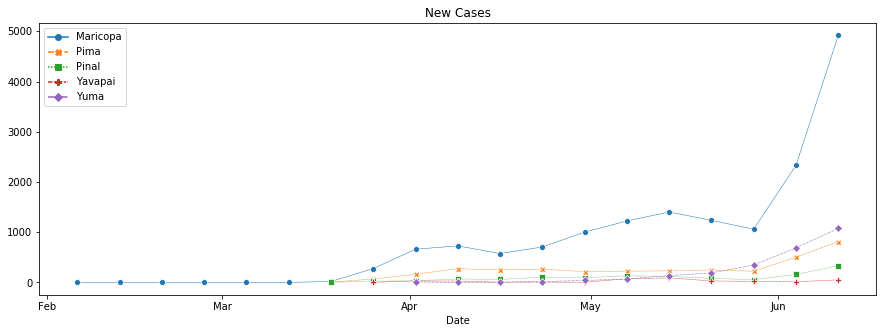

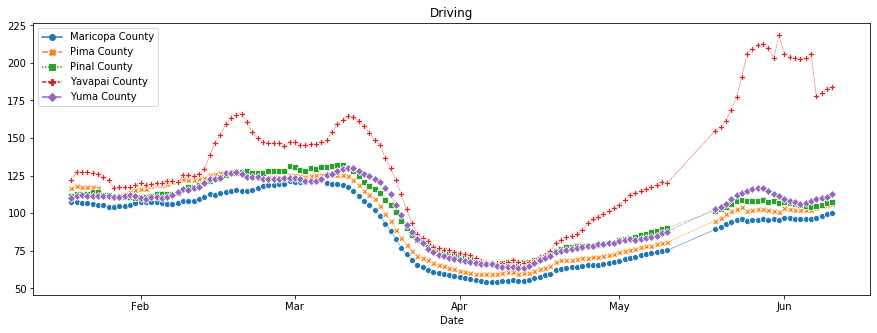

In [146]:
countyDashBoard(["Maricopa","Pima","Pinal","Yavapai","Yuma"],state="Arizona")

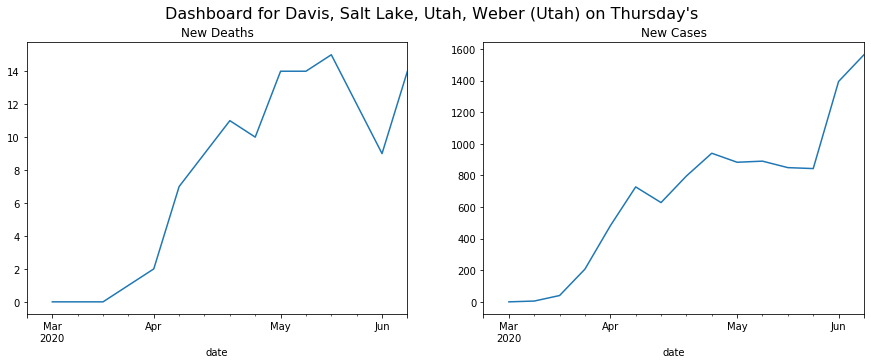

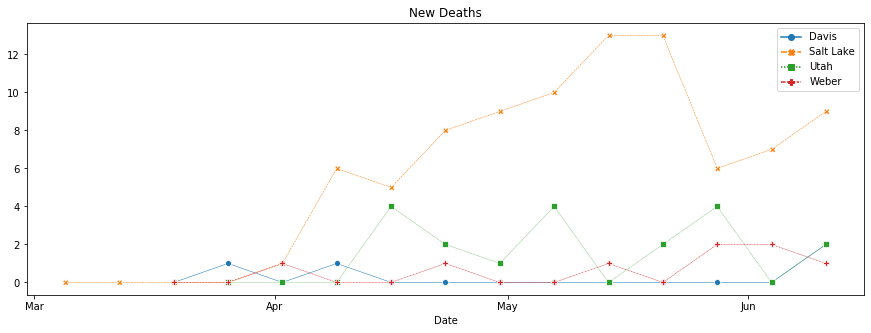

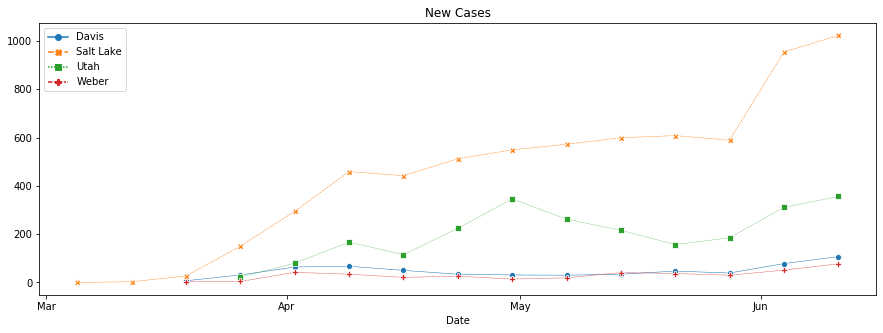

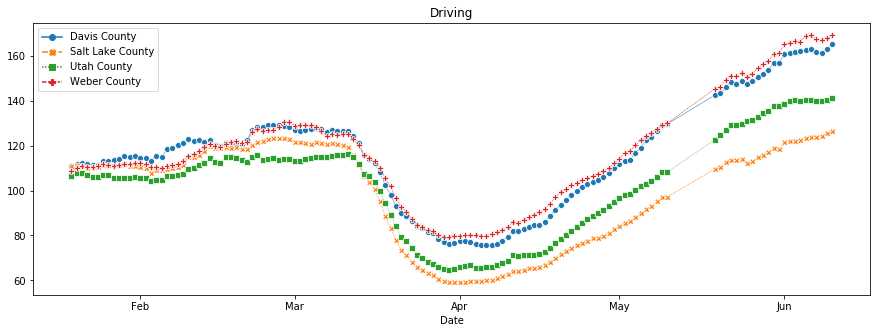

In [147]:
countyDashBoard(["Salt Lake","Utah","Davis","Weber"],state="Utah")

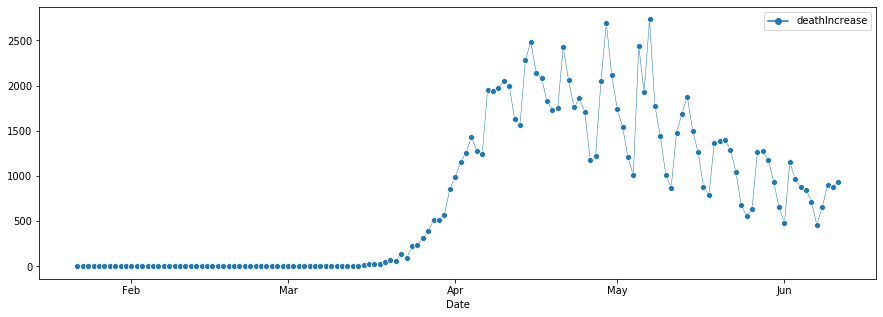

In [148]:
#theatlantic.deathIncrease.plot()
temp = myplot(theatlantic[["deathIncrease"]])

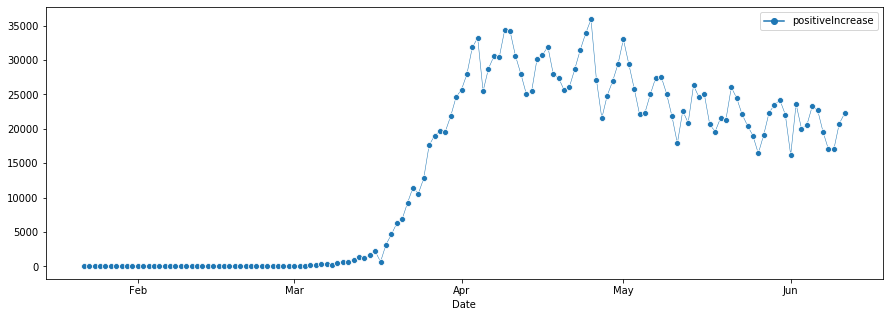

In [149]:
#theatlantic.deathIncrease.plot()
temp = myplot(theatlantic[["positiveIncrease"]])

In [150]:
theatlantic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142 entries, 2020-06-11 to 2020-01-22
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      142 non-null    int64         
 1   states                    142 non-null    int64         
 2   positive                  142 non-null    int64         
 3   negative                  104 non-null    float64       
 4   pending                   100 non-null    float64       
 5   hospitalizedCurrently     87 non-null     float64       
 6   hospitalizedCumulative    83 non-null     float64       
 7   inIcuCurrently            78 non-null     float64       
 8   inIcuCumulative           79 non-null     float64       
 9   onVentilatorCurrently     79 non-null     float64       
 10  onVentilatorCumulative    72 non-null     float64       
 11  recovered                 79 non-null     float64       
 12  dat

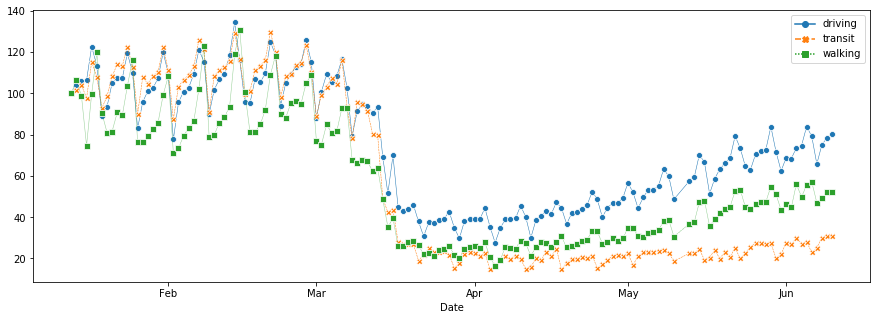

In [151]:
ax = myplot(SanFranMob[['driving','transit','walking']])

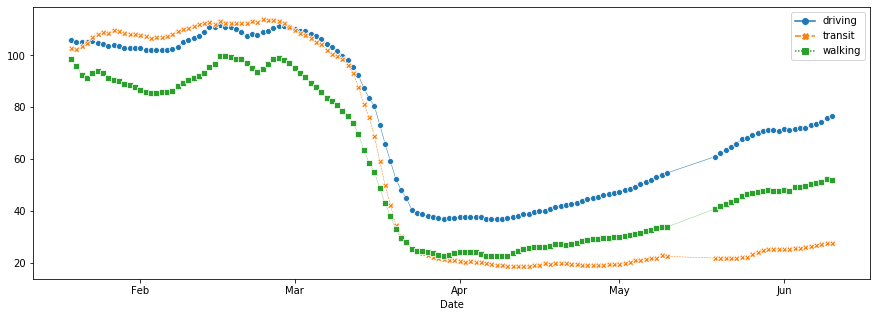

In [152]:
ax = myplot(SanFranMob[['driving','transit','walking']].rolling(7).mean())